In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sqlalchemy import create_engine
from sklearn.preprocessing import OrdinalEncoder

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (16,9)

In [10]:
eng = create_engine("sqlite:///lamost.db5")

In [11]:
pd.read_sql("SELECT * FROM star LIMIT 1", eng).columns

Index(['index', 'obsid', 'designation', 'obsdate', 'lmjd', 'mjd', 'planid',
       'spid', 'fiberid', 'ra_obs', 'dec_obs', 'snru', 'snrg', 'snrr', 'snri',
       'snrz', 'objtype', 'class', 'subclass', 'z', 'z_err', 'magtype', 'mag1',
       'mag2', 'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 'tsource', 'fibertype',
       'tfrom', 'tcomment', 'offsets', 'offset_v', 'ra', 'dec', 'teff',
       'teff_err', 'logg', 'logg_err', 'feh', 'feh_err', 'rv', 'rv_err'],
      dtype='object')

In [13]:
sql = "SELECT subclass FROM star"
dat = pd.read_sql(sql, eng)

In [15]:
sub = np.unique(dat["subclass"])

In [16]:
enc = OrdinalEncoder().fit(sub.reshape(-1,1))
cat = enc.transform(dat["subclass"].values.reshape(-1,1))

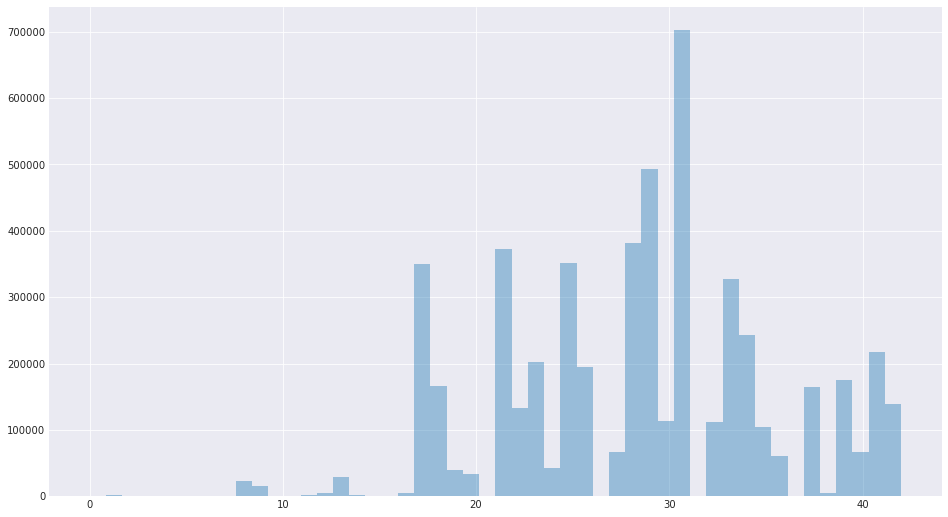

In [17]:
sns.distplot(cat, kde=False)